In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install nibabel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import random
import numpy as np
import nibabel as nib
import os
from glob import glob as gl
import cv2

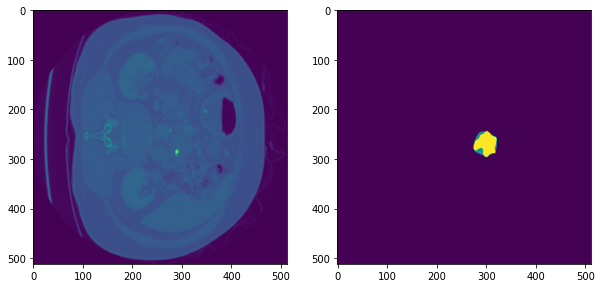

In [ ]:
image_test = nib.load('/content/drive/MyDrive/ppt/image/pancreas_001.nii.gz').get_fdata()
label_test = nib.load('/content/drive/MyDrive/ppt/mask/pancreas_001.nii.gz').get_fdata()
n = random.randint(0, 109)
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(image_test[:, :, n])
plt.subplot(1, 2, 2)
plt.imshow(label_test[:,:,n])
plt.show()

In [ ]:
path_root_image = '/content/drive/MyDrive/data/train/*'
path_root_label = '/content/drive/MyDrive/data/label/*'

In [ ]:
def save_slices_with_all_numbers(paths, batch_size):
  t = 0
  for i in range(0, len(paths), batch_size):
      batch_paths = paths[i:i+batch_size]
      dir_image = batch_paths[0]
      txt = dir_image.split('_')
      image = nib.load(dir_image)
      image_data = image.get_fdata()
      img = nib.load('/content/drive/MyDrive/data/train/pancreas_'+str(txt[1]))
      img_data = img.get_fdata()
      for i in range(image_data.shape[2]):
          slice_data = image_data[:, :, i]
          unique_numbers = set(np.unique(slice_data))
          if {0., 1., 2.}.issubset(unique_numbers):
              np.save('/content/drive/MyDrive/tmp/label/label_' +str(t)+'.npy', slice_data)
              np.save('/content/drive/MyDrive/tmp/image/image_' +str(t)+'.npy', img_data[:, :, i])
              t += 1

In [ ]:
path_label = []
for i in gl(path_root_label):
  path_label.append(i)

In [ ]:
save_slices_with_all_numbers(path_label, 1)

In [ ]:
def find_min_max_of_ones(label):
  min_i, min_j, max_i, max_j = 512, 512, 0, 0
  for i in range(0, 512):
      for j in range(0, 512):
          if (label[i][j] == 1):
              min_i = min(min_i, i)
              min_j = min(min_j, j)
              max_i = max(max_i, i)
              max_j = max(max_j, j)
  return (min_i - 1, max_i + 1, min_j - 1, max_j + 1)

In [ ]:
path_image = '/content/drive/MyDrive/research/image/image_0.npy'
path_label = '/content/drive/MyDrive/research/label/label_0.npy'
image = np.load(path_image)
label = np.load(path_label)

In [ ]:
a, b, c, d = find_min_max_of_ones(label)
print(a, b, c, d)

261 274 285 304


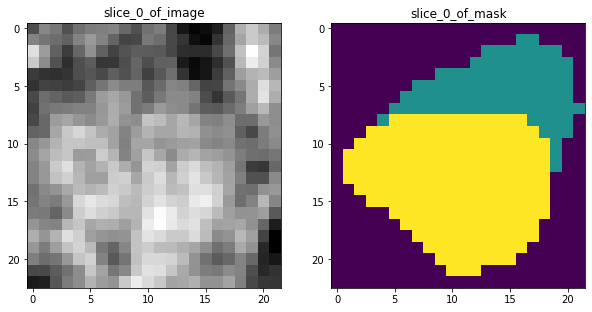

In [ ]:
plt.figure(figsize = (10, 10))
plt.subplot(1, 2, 1)
plt.title('slice_0_of_image')
plt.imshow(image, cmap = 'gray')
plt.subplot(1, 2, 2)
plt.title('slice_0_of_mask')
plt.imshow(label)
plt.show()

Hinh thu:  0


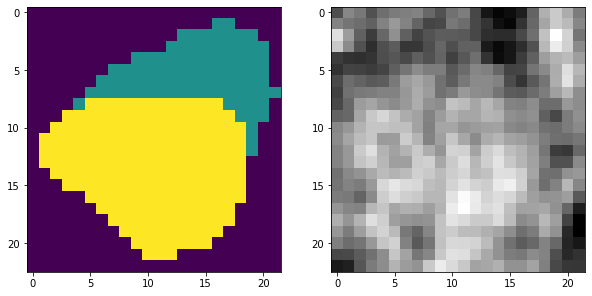

Hinh thu:  1


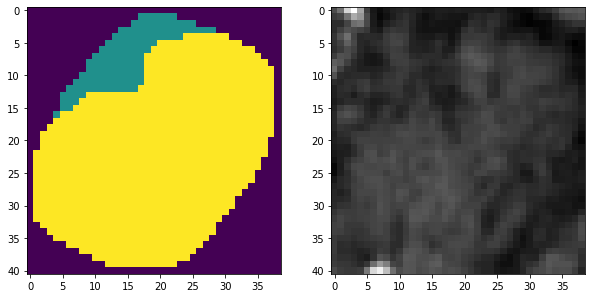

Hinh thu:  2


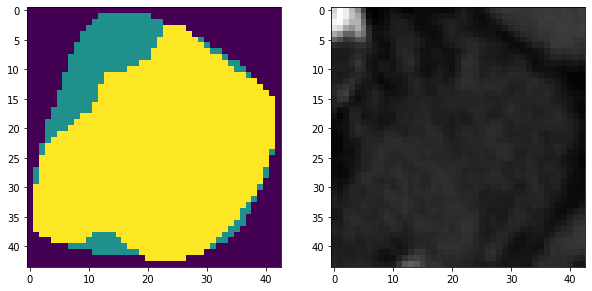

Hinh thu:  3


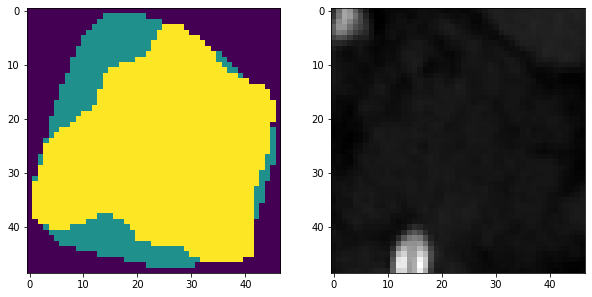

Hinh thu:  4


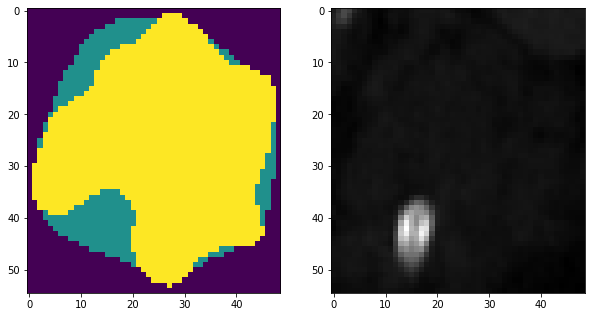

Hinh thu:  5


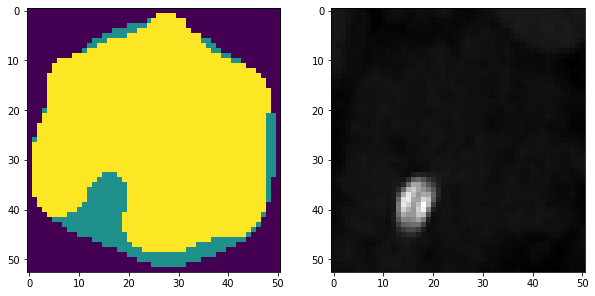

Hinh thu:  6


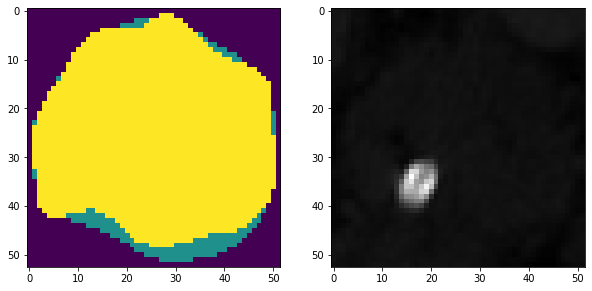

Hinh thu:  7


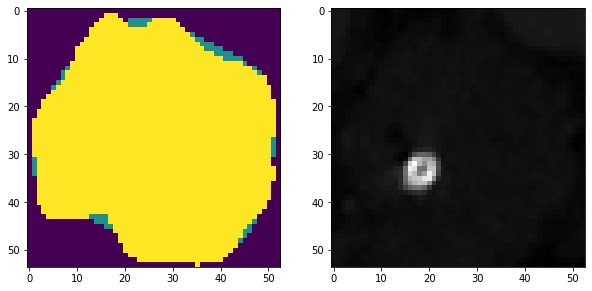

Hinh thu:  8


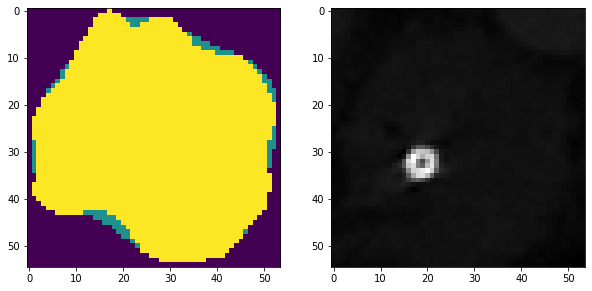

Hinh thu:  9


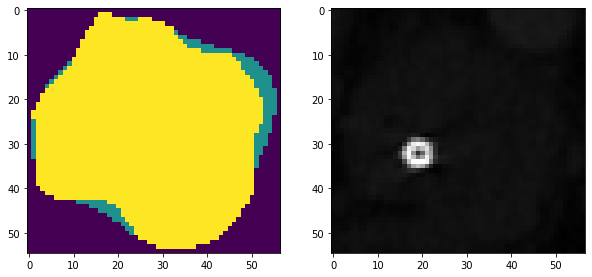

Hinh thu:  10


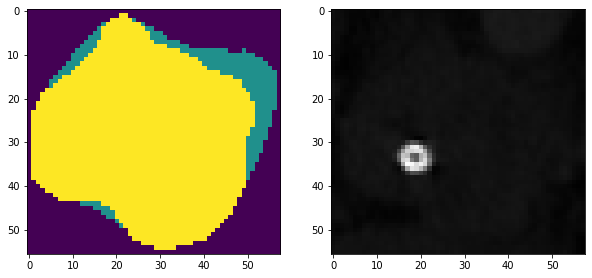

Hinh thu:  11


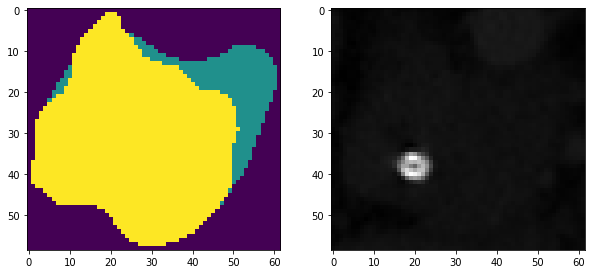

Hinh thu:  12


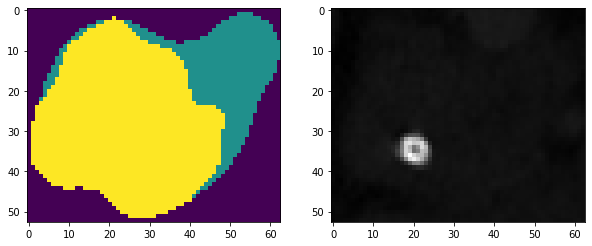

Hinh thu:  13


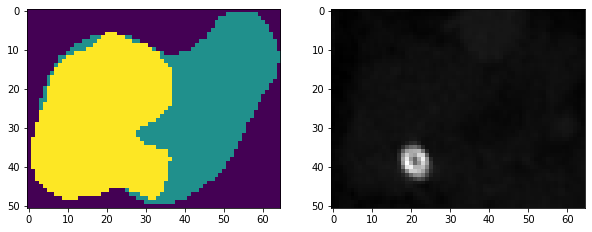

Hinh thu:  14


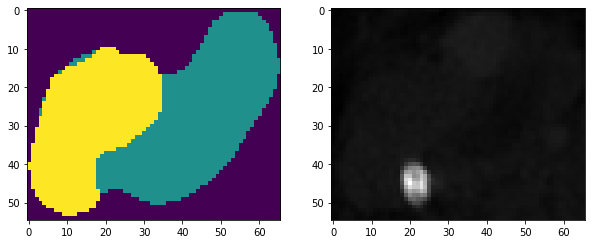

Hinh thu:  15


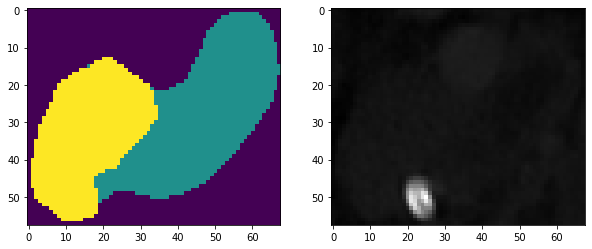

Hinh thu:  16


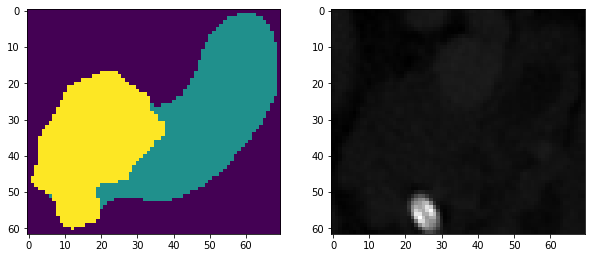

Hinh thu:  17


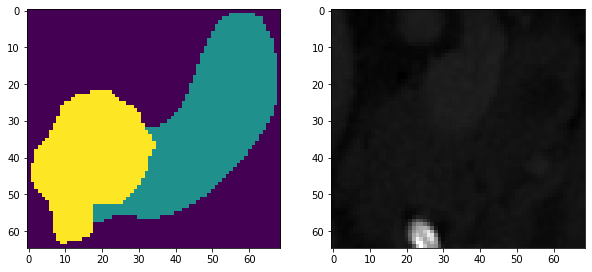

Hinh thu:  18


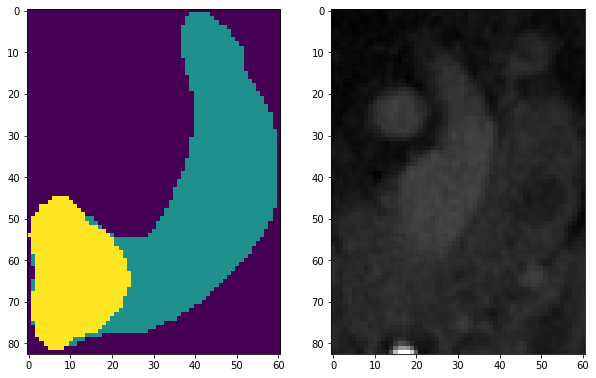

Hinh thu:  19


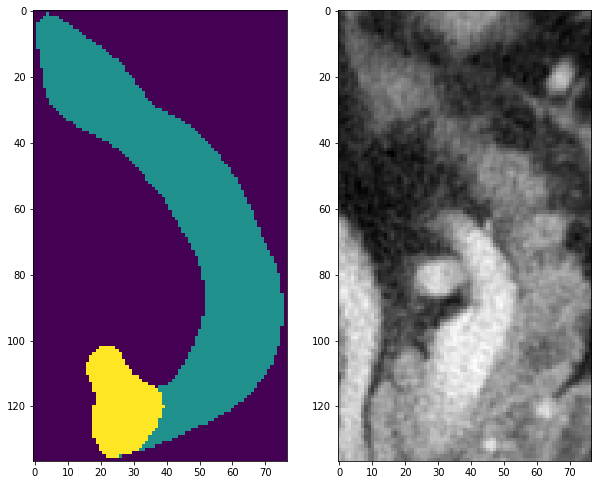

Hinh thu:  20


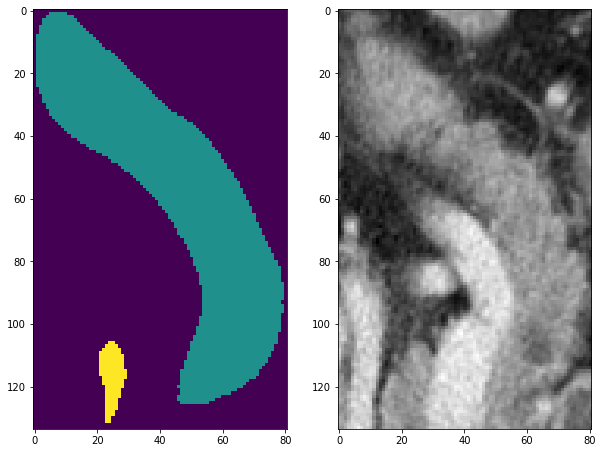

Hinh thu:  21


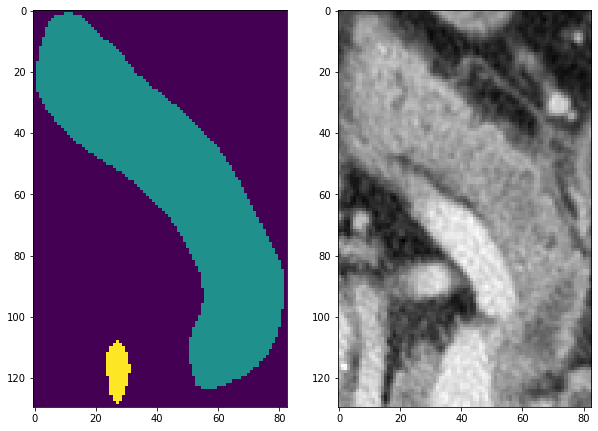

Hinh thu:  22


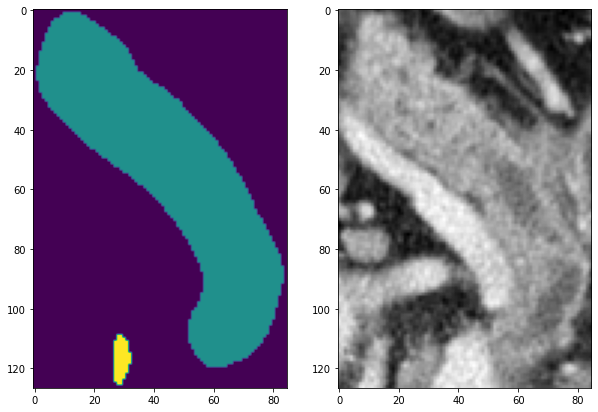

Hinh thu:  23


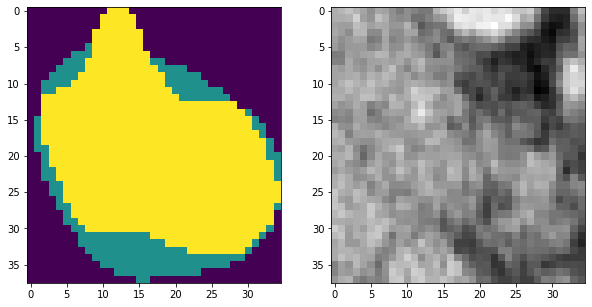

Hinh thu:  24


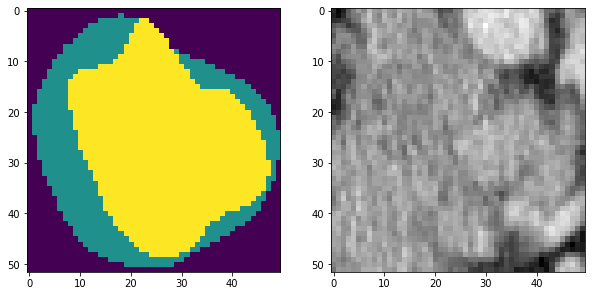

Hinh thu:  25


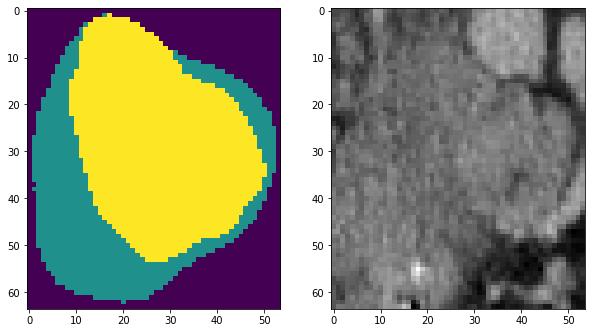

Hinh thu:  26


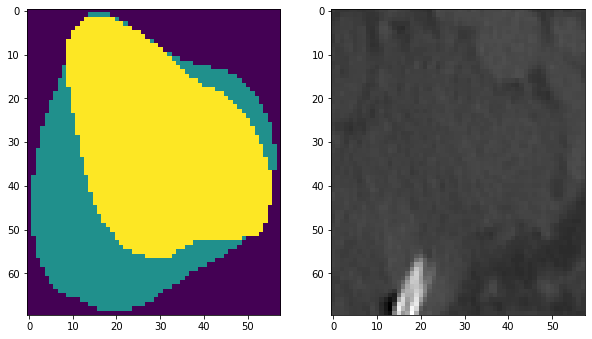

Hinh thu:  27


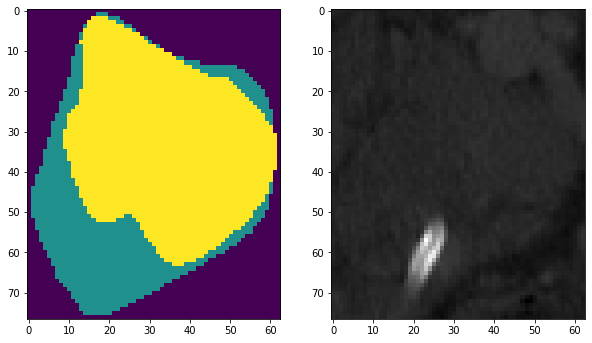

Hinh thu:  28


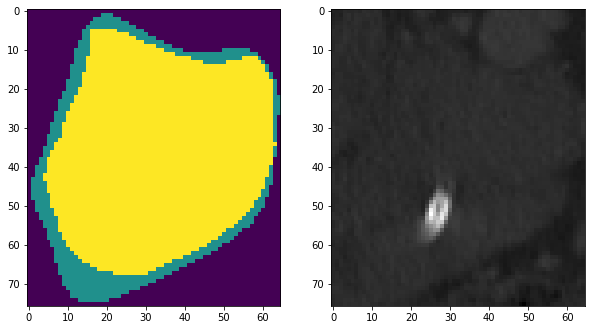

Hinh thu:  29


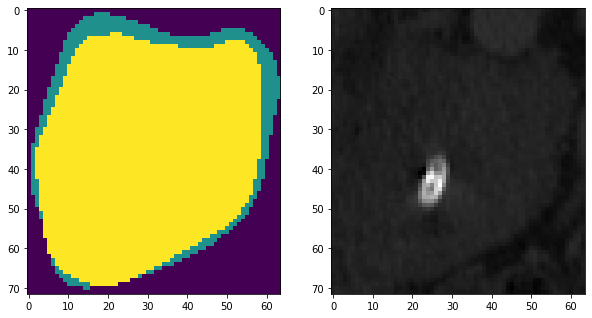

Hinh thu:  30


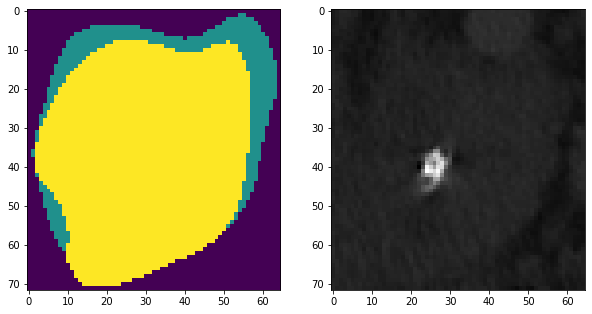

Hinh thu:  31


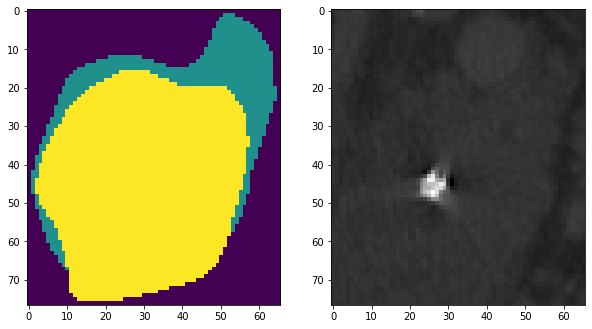

Hinh thu:  32


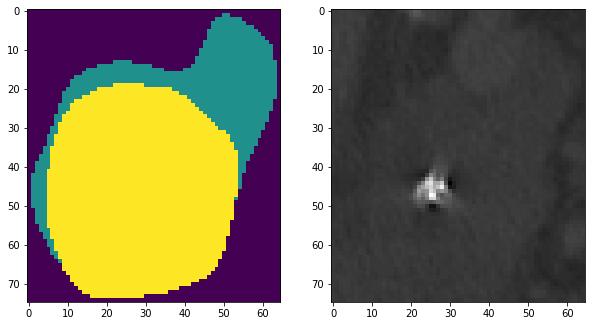

Hinh thu:  33


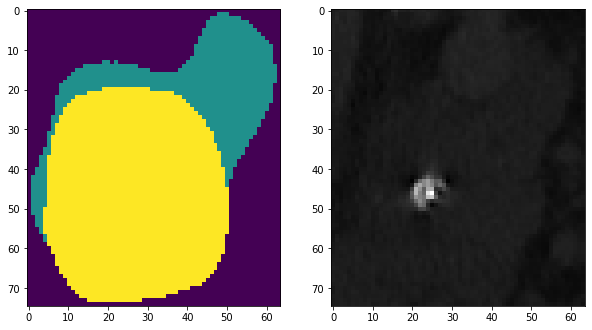

Hinh thu:  34


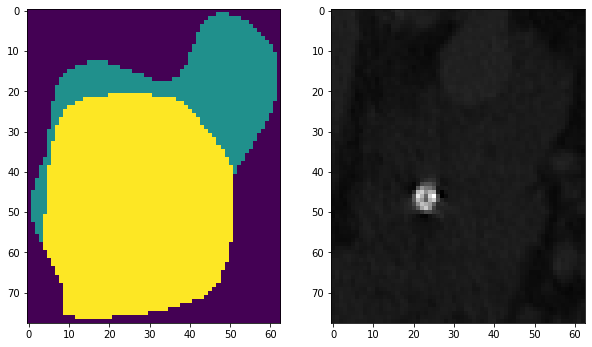

Hinh thu:  35


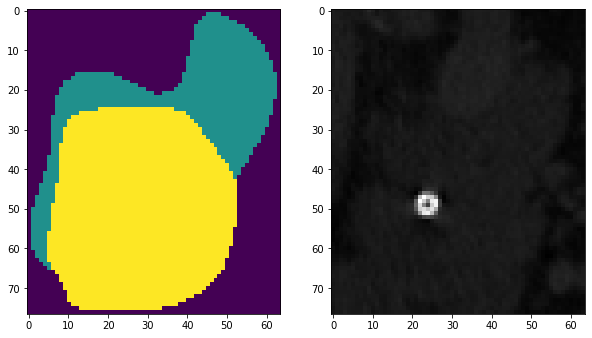

Hinh thu:  36


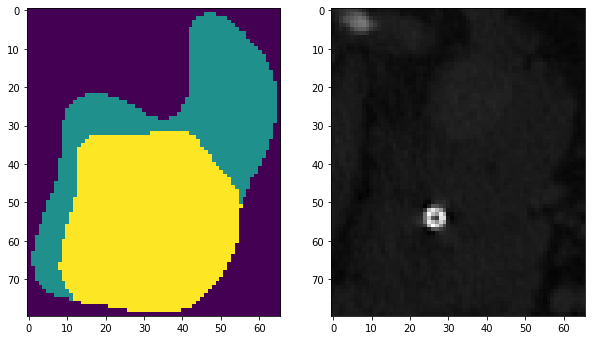

Hinh thu:  37


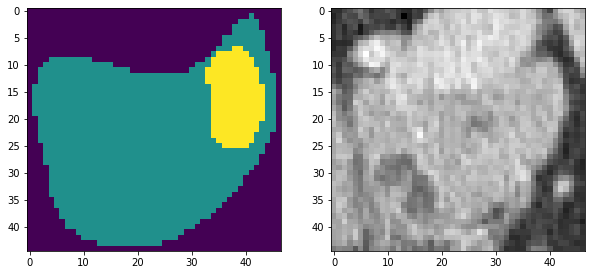

Hinh thu:  38


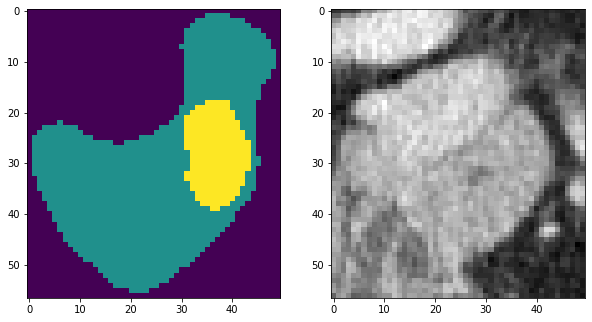

Hinh thu:  39


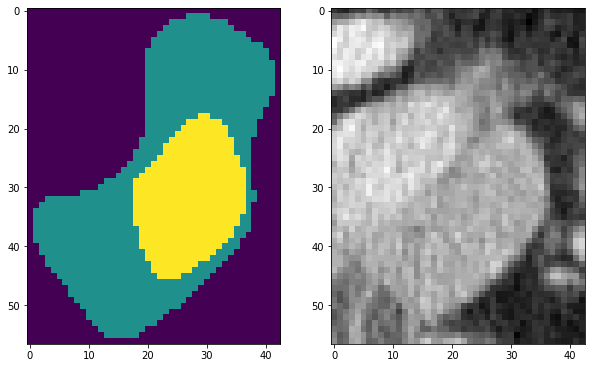

Hinh thu:  40


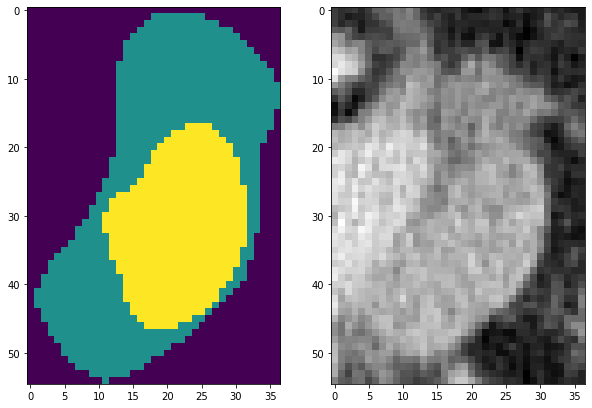

Hinh thu:  41


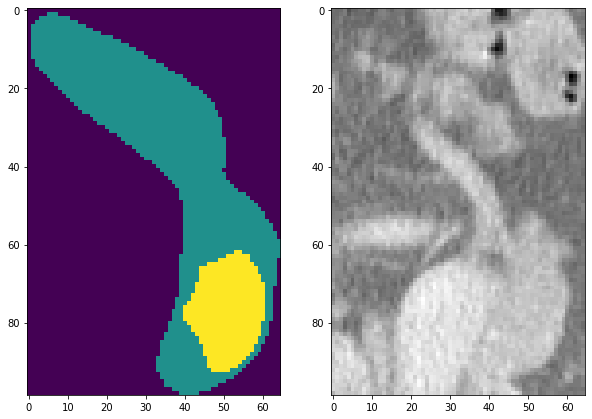

Hinh thu:  42


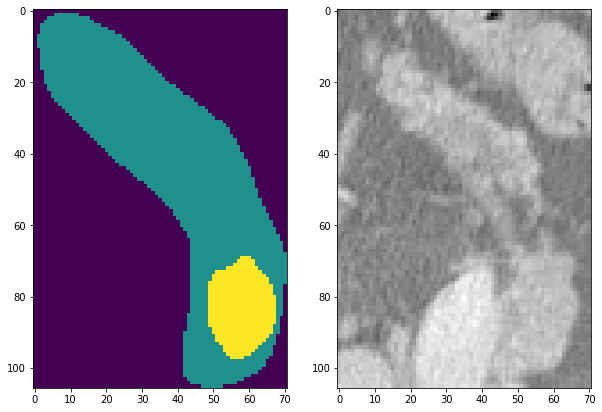

Hinh thu:  43


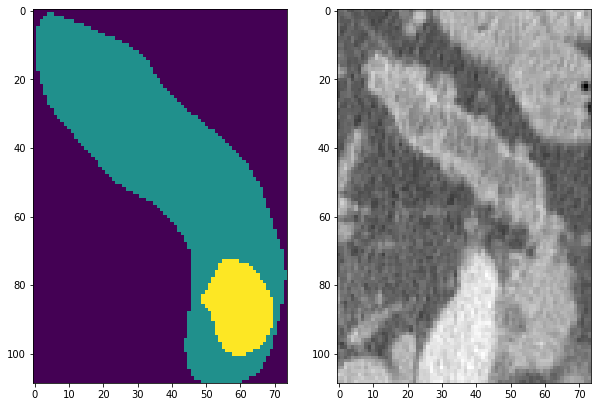

Hinh thu:  44


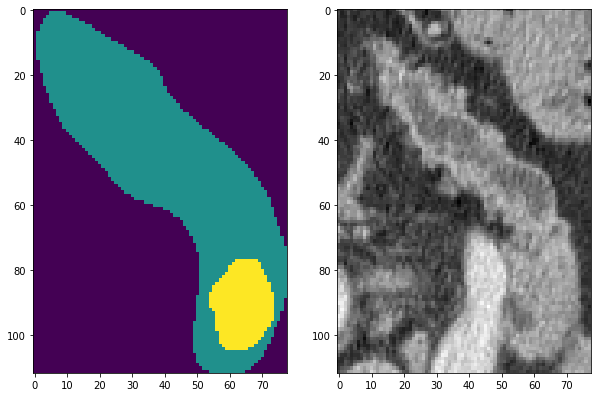

Hinh thu:  45


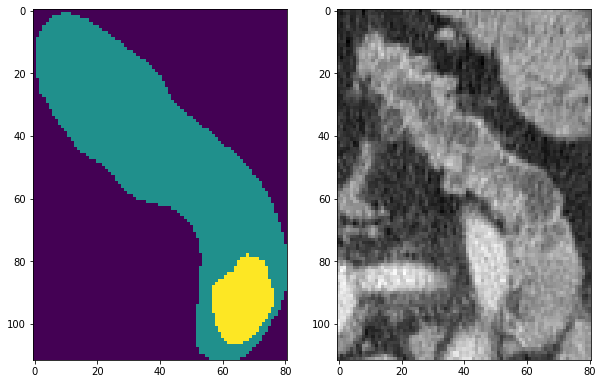

Hinh thu:  46


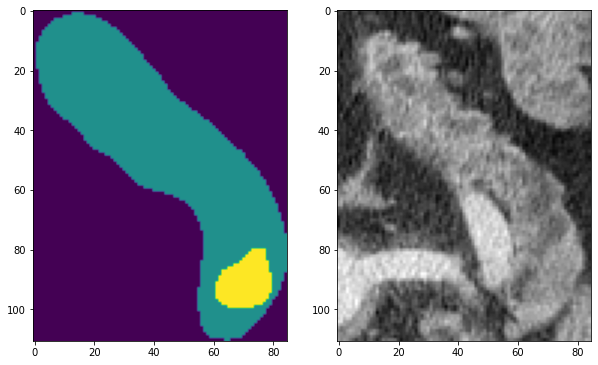

Hinh thu:  47


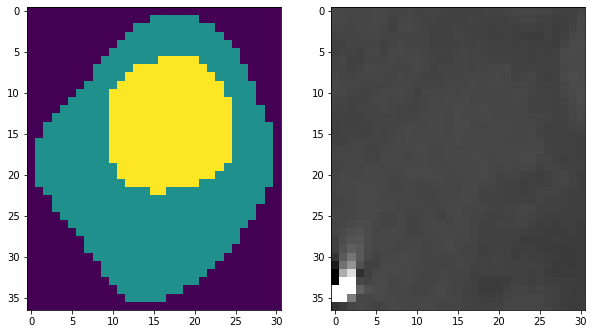

Hinh thu:  48


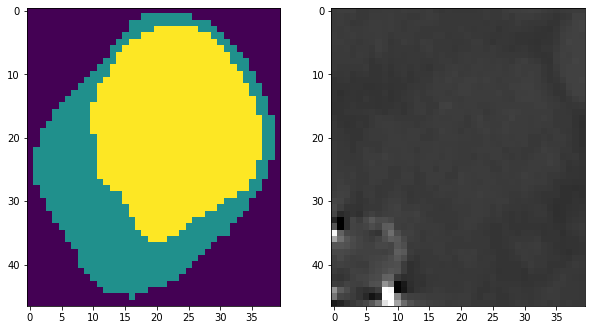

Hinh thu:  49


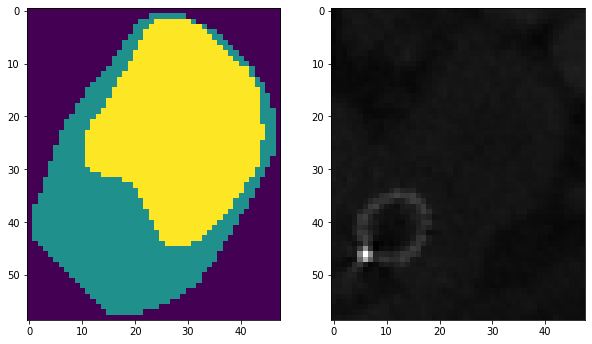

Hinh thu:  50


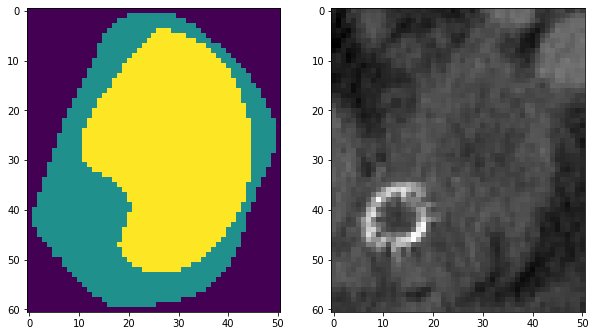

Hinh thu:  51


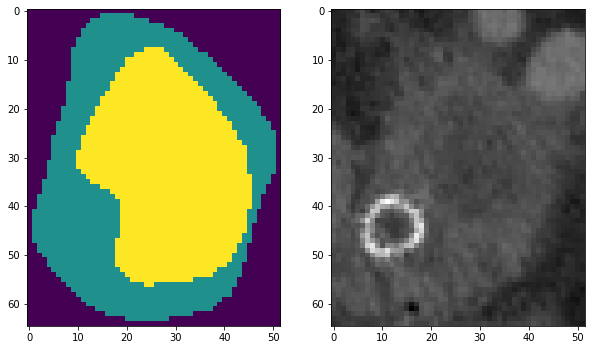

Hinh thu:  52


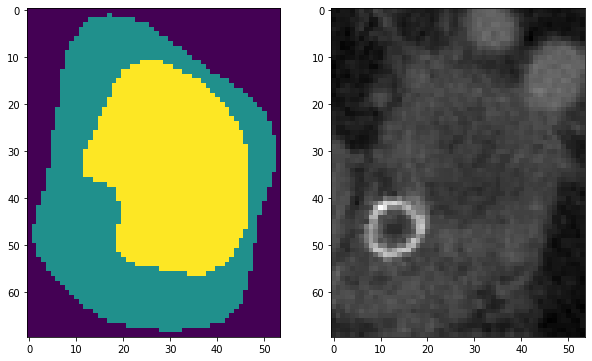

Hinh thu:  53


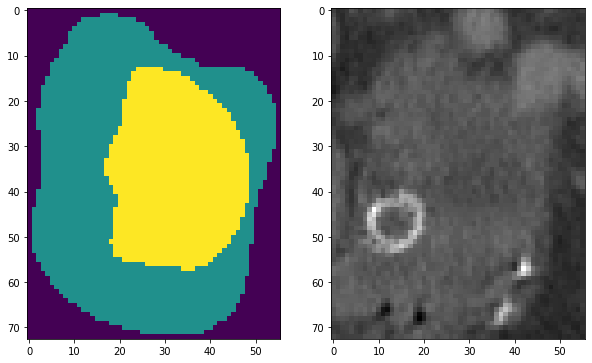

Hinh thu:  54


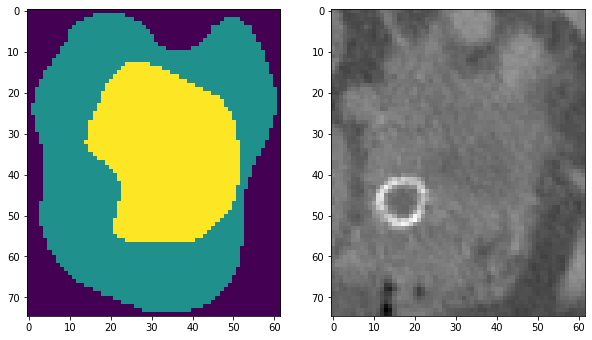

Hinh thu:  55


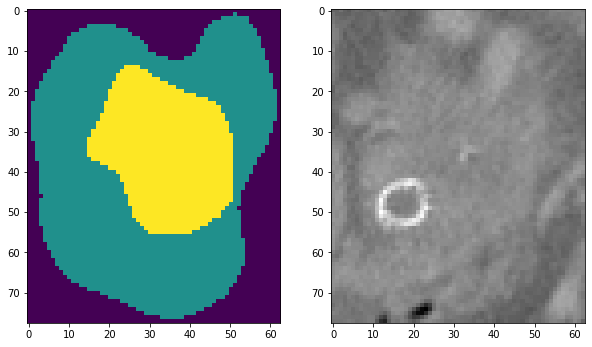

Hinh thu:  56


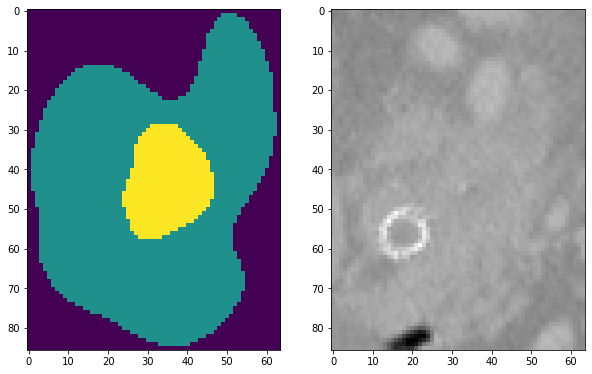

Hinh thu:  57


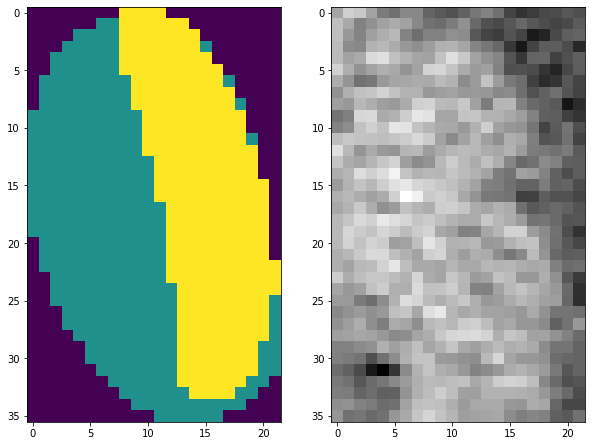

Hinh thu:  58


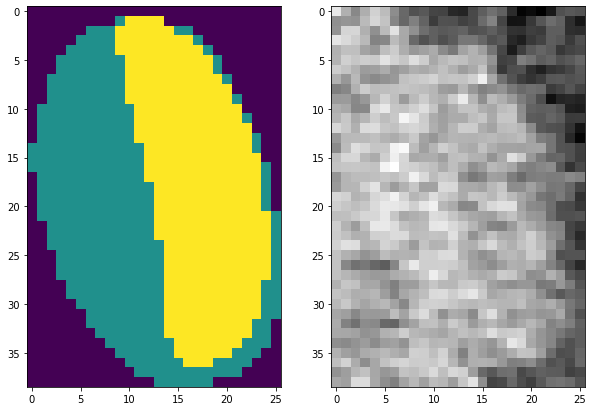

Hinh thu:  59


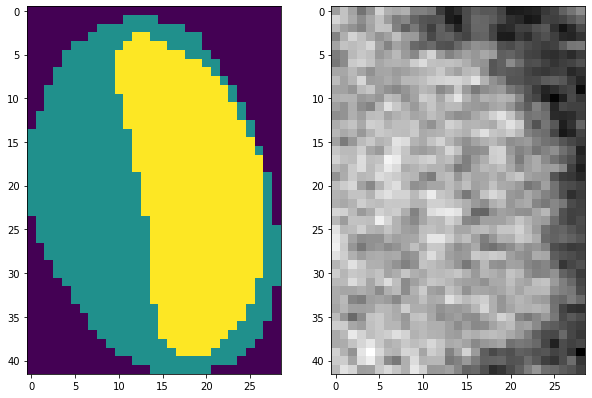

Hinh thu:  60


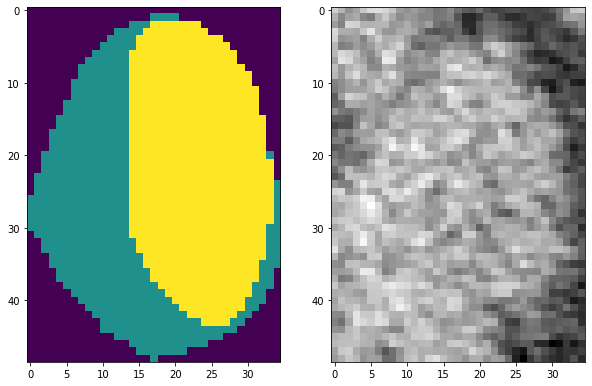

Hinh thu:  61


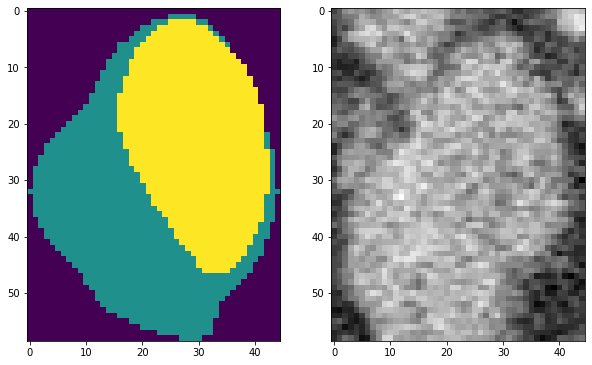

Hinh thu:  62


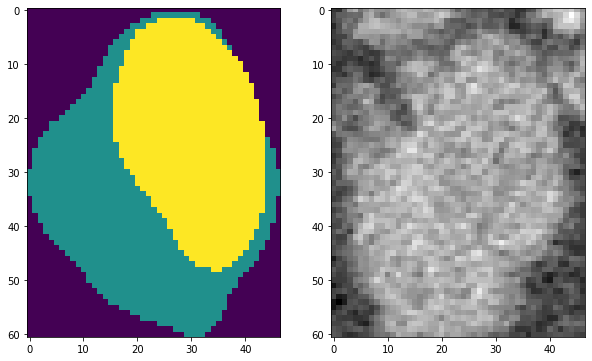

Hinh thu:  63


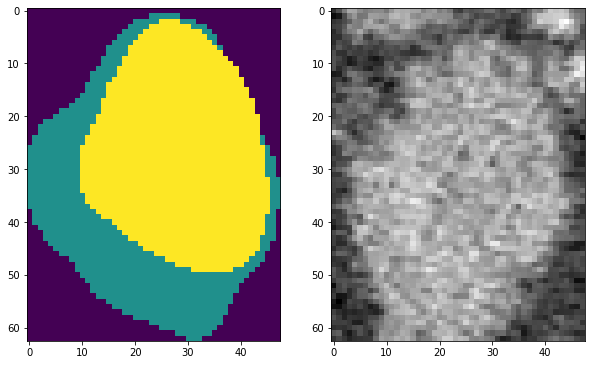

Hinh thu:  64


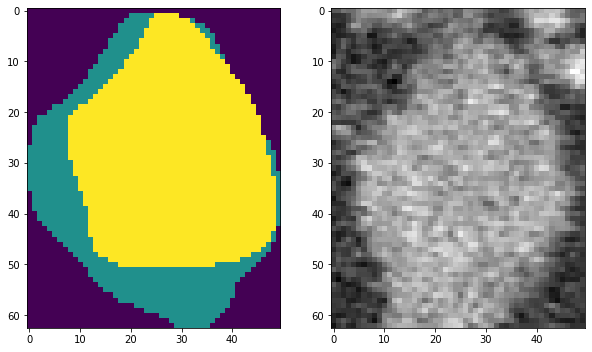

Hinh thu:  65


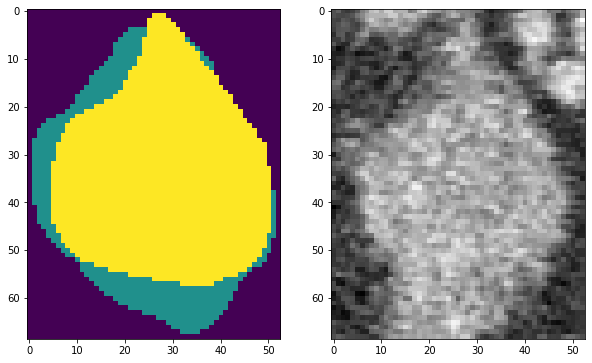

Hinh thu:  66


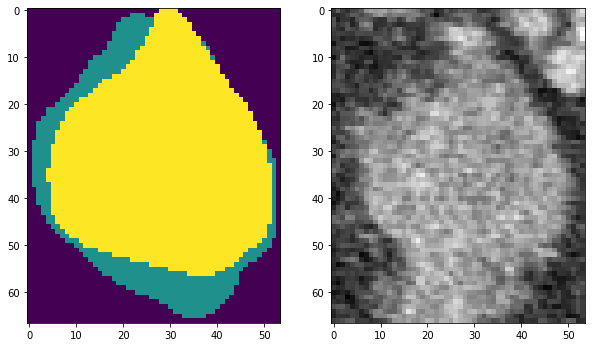

Hinh thu:  67


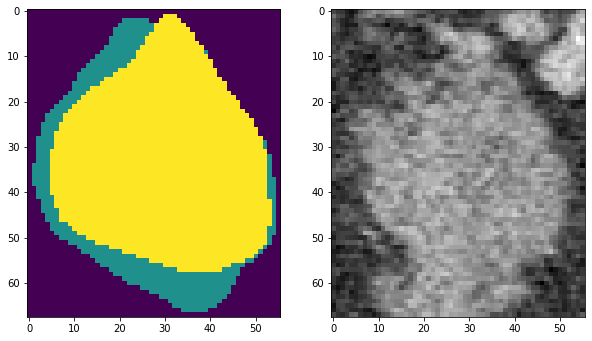

Hinh thu:  68


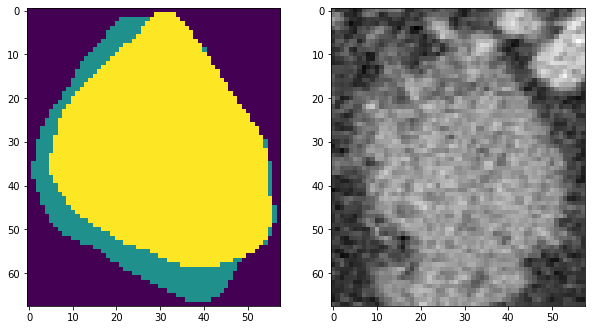

Hinh thu:  69


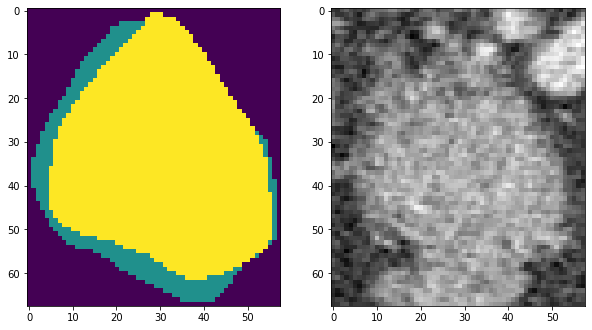

Hinh thu:  70


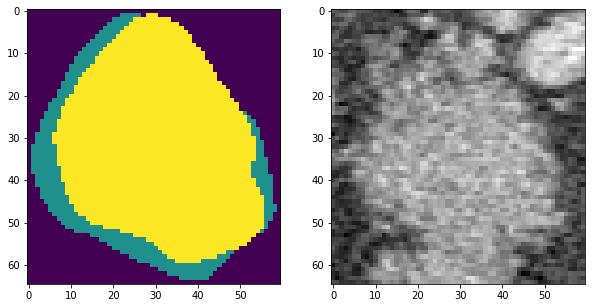

Hinh thu:  71


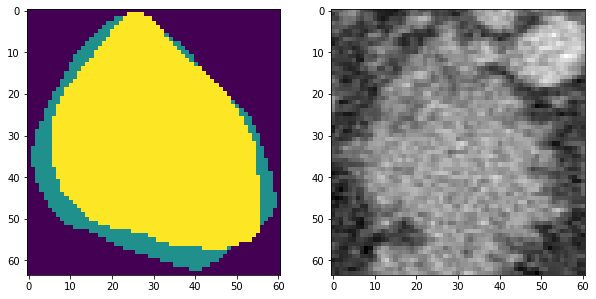

Hinh thu:  72


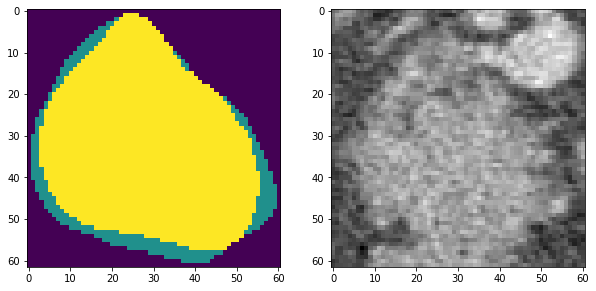

Hinh thu:  73


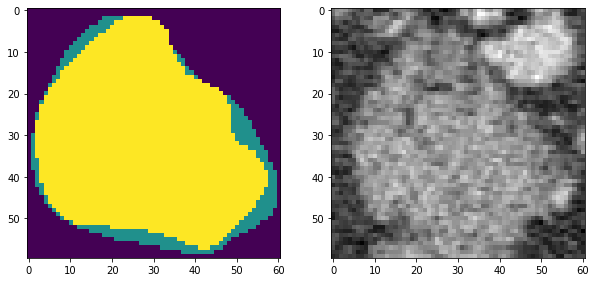

Hinh thu:  74


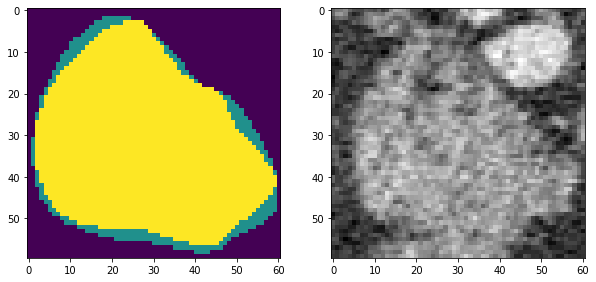

Hinh thu:  75


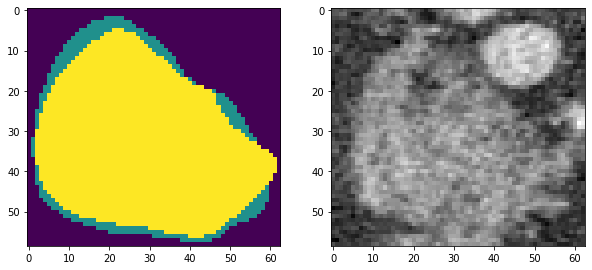

Hinh thu:  76


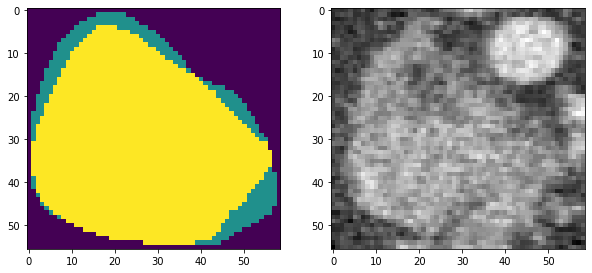

Hinh thu:  77


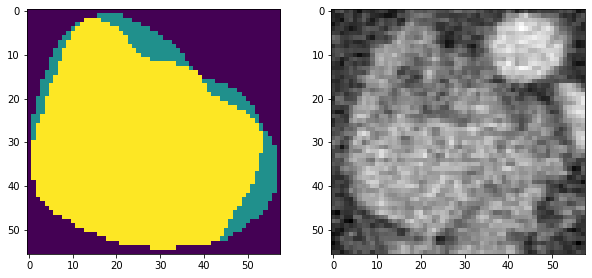

Hinh thu:  78


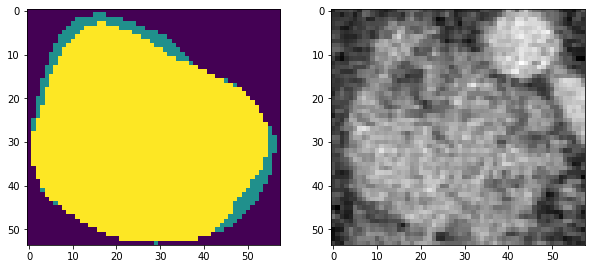

Hinh thu:  79


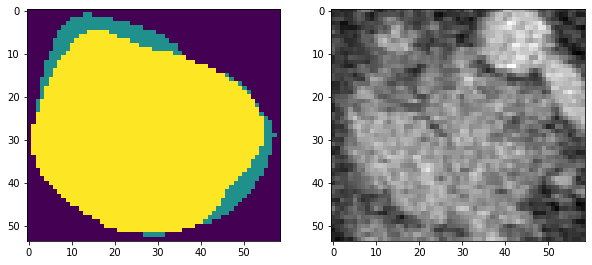

Hinh thu:  80


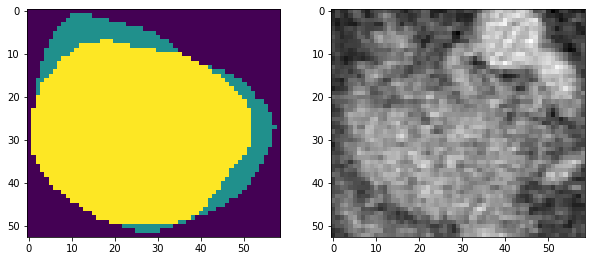

Hinh thu:  81


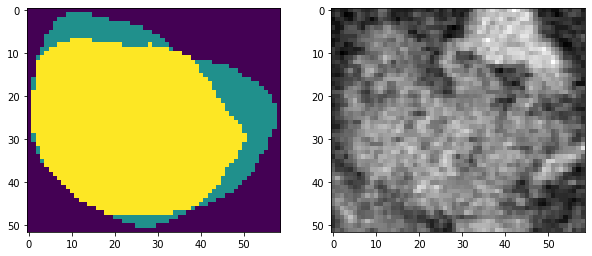

Hinh thu:  82


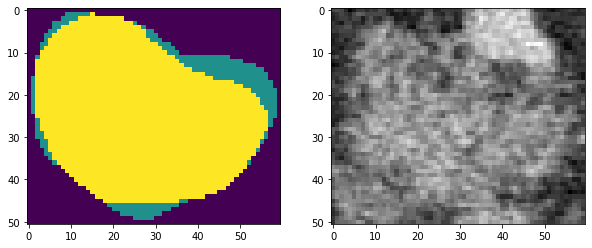

Hinh thu:  83


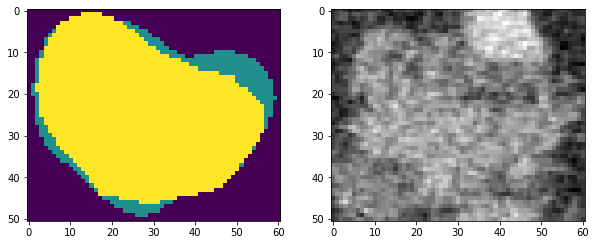

Hinh thu:  84


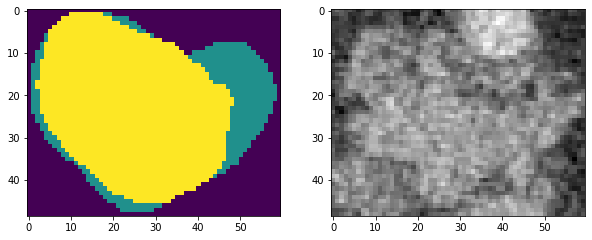

Hinh thu:  85


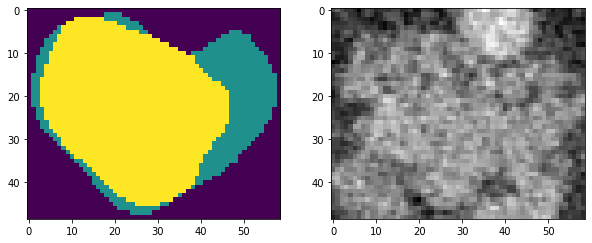

Hinh thu:  86


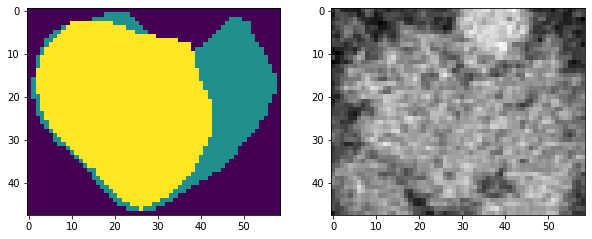

Hinh thu:  87


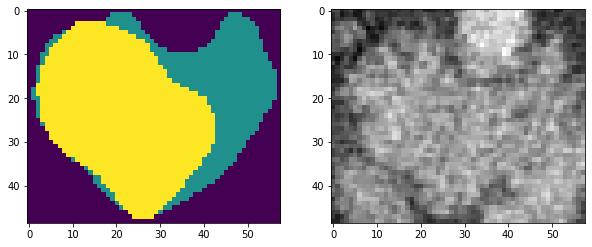

Hinh thu:  88


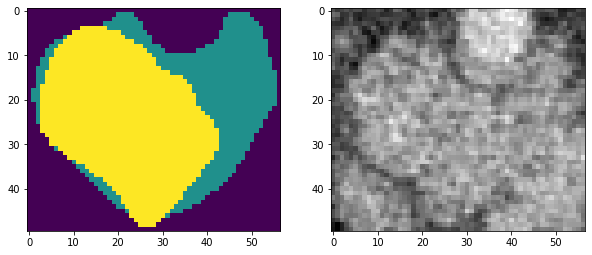

Hinh thu:  89


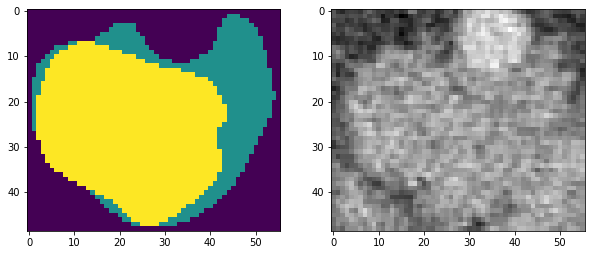

Hinh thu:  90


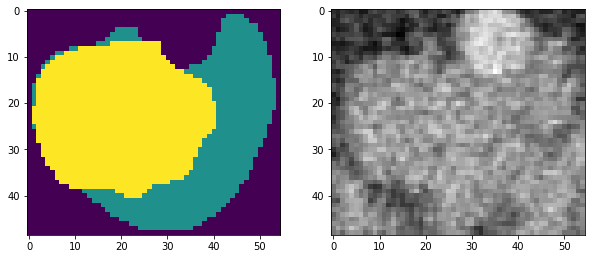

Hinh thu:  91


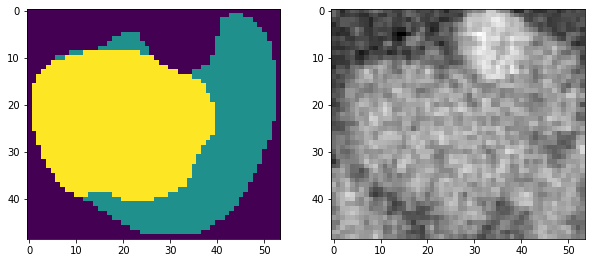

Hinh thu:  92


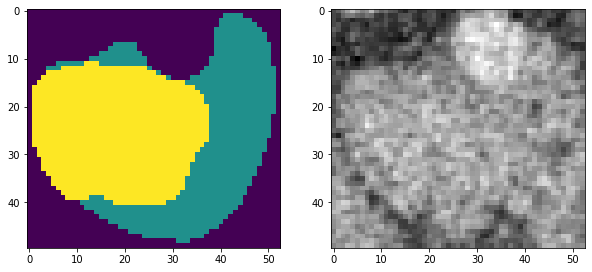

Hinh thu:  93


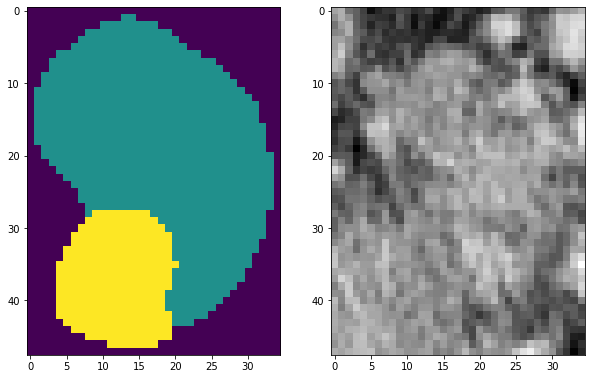

Hinh thu:  94


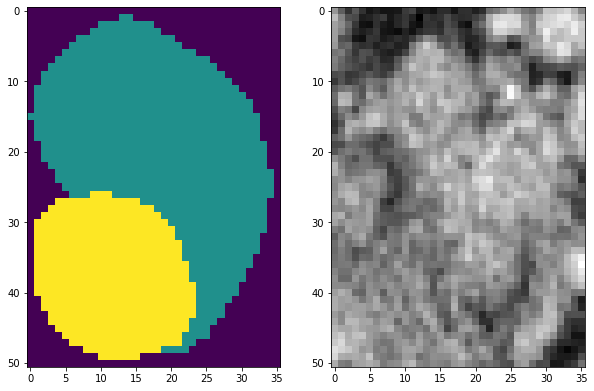

Hinh thu:  95


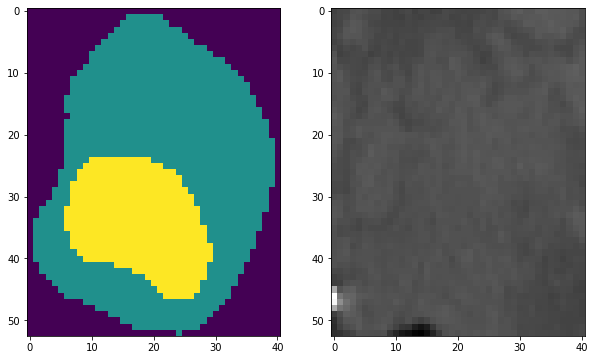

Hinh thu:  96


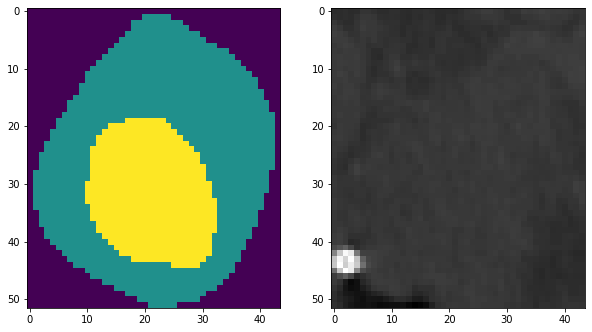

Hinh thu:  97


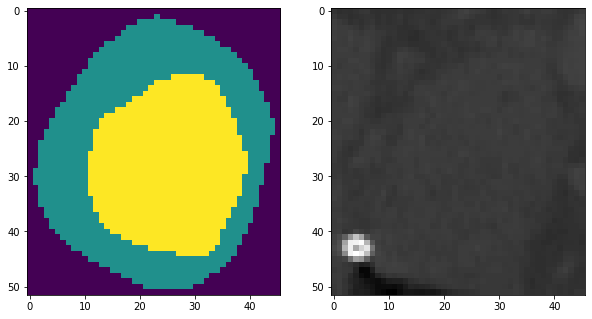

Hinh thu:  98


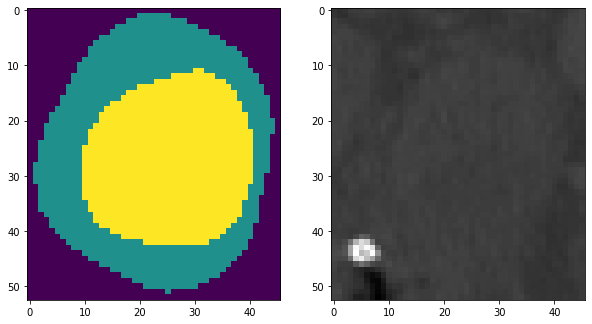

Hinh thu:  99


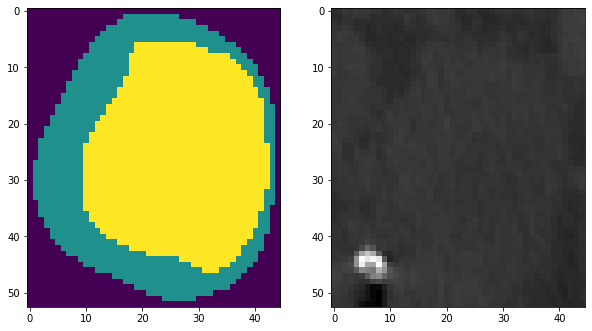

In [ ]:
for i in range(0, 100):
  path_img = '/content/drive/MyDrive/research/image/image_'+str(i)+'.npy'
  path_msk = '/content/drive/MyDrive/research/label/label_'+str(i)+'.npy'
  img = np.load(path_img)
  msk = np.load(path_msk)
  #min_i, max_i, min_j, max_j = find_min_max_of_ones(msk)
  #min_i -= 0
  #max_i += 1
  #max_j += 1
  #min_j -= 0
  print('Hinh thu: ', i)
  plt.figure(figsize = (10, 10))
  plt.subplot(1, 2, 1)
  plt.imshow(msk)
  plt.subplot(1, 2, 2)
  plt.imshow(img, cmap = 'gray')
  plt.show()
  #np.save('/content/drive/MyDrive/research/image/image_'+str(i), img[min_i:max_i, min_j:max_j])
  #np.save('/content/drive/MyDrive/research/label/label_'+str(i), msk[min_i:max_i, min_j:max_j])

In [ ]:
image = np.load('/content/drive/MyDrive/research/image/image_42.npy')
lbl = np.load('/content/drive/MyDrive/research/label/label_42.npy')

(128, 128, 1)
(128, 128)


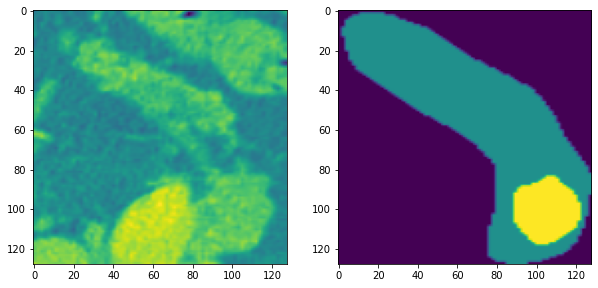

In [ ]:
img = cv2.resize(image, (128, 128))
img = np.expand_dims(img, axis=-1)
lbl = cv2.resize(lbl, (128, 128))
print(img.shape)
print(lbl.shape)
plt.figure(figsize = (10, 10))
plt.subplot(1, 2, 1)
plt.imshow(img[:, :, 0])
plt.subplot(1, 2, 2)
plt.imshow(lbl[:, :])
plt.show()

In [ ]:
i = 2528
path_img = '/content/drive/MyDrive/tmp/image/image_'+str(i)+'.npy'
path_msk = '/content/drive/MyDrive/tmp/label/label_'+str(i)+'.npy'
img = np.load(path_img)
msk = np.load(path_msk)

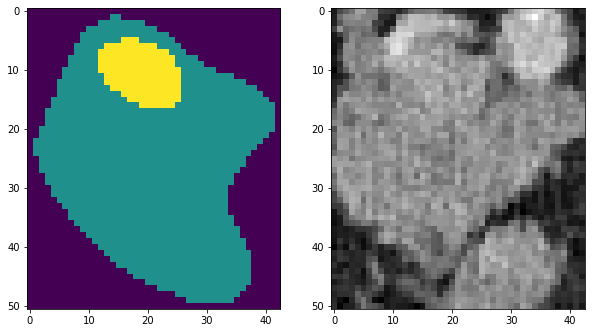

In [ ]:
min_i, max_i, min_j, max_j = find_min_max_of_ones(msk)
min_i -= 0
max_i += 1
max_j += 1
min_j -= 0
plt.figure(figsize = (10, 10))
plt.subplot(1, 2, 1)
plt.imshow(msk[min_i:max_i, min_j:max_j])
plt.subplot(1, 2, 2)
plt.imshow(img[min_i:max_i, min_j:max_j], cmap = 'gray')
plt.show()

In [ ]:
np.save('/content/drive/MyDrive/research/image/image_'+str(i), img[min_i:max_i, min_j:max_j])
np.save('/content/drive/MyDrive/research/label/label_'+str(i), msk[min_i:max_i, min_j:max_j])

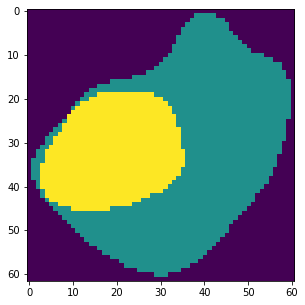

In [ ]:
plt.figure(figsize = (5, 5))
plt.imshow(np.load('/content/drive/MyDrive/research/label/label_410.npy'))
plt.show()